<a href="https://colab.research.google.com/github/eyadrid/Breast-Cancer-Classification-with-NN/blob/main/Breast_Cancer_Classification_with_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [2]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
breast_cancer_dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
data_frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data_frame['label'] = breast_cancer_dataset.target

In [6]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [9]:
data_frame['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [10]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [11]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [12]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
Scaler = StandardScaler()
X_train_std = Scaler.fit_transform(X_train)
X_test_std = Scaler.fit_transform(x_test)

In [15]:
print(X.shape, X_train.shape,Y_train.shape, x_test.shape)

(569, 30) (455, 30) (455,) (114, 30)


In [16]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [17]:
#setting up the layers of Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])
#dans keras.layers.Dense() 2 is equal to the number of classe in the target

In [18]:
#compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
#training the neural network
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 21ms/step - loss: 0.6258 - accuracy: 0.6479 - val_loss: 0.5419 - val_accuracy: 0.7826
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.4158 - accuracy: 0.8900 - val_loss: 0.3737 - val_accuracy: 0.8261
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3092 - accuracy: 0.9291 - val_loss: 0.2893 - val_accuracy: 0.9130
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2525 - accuracy: 0.9438 - val_loss: 0.2410 - val_accuracy: 0.9130
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2144 - accuracy: 0.9511 - val_loss: 0.2111 - val_accuracy: 0.9130
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 0.1890 - accuracy: 0.9584 - val_loss: 0.1886 - val_accuracy: 0.9130
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1693 - accuracy: 0.9609 - val_loss: 0.1719 - val_accuracy: 0.9348
Epoch 8/10
13/13 [=

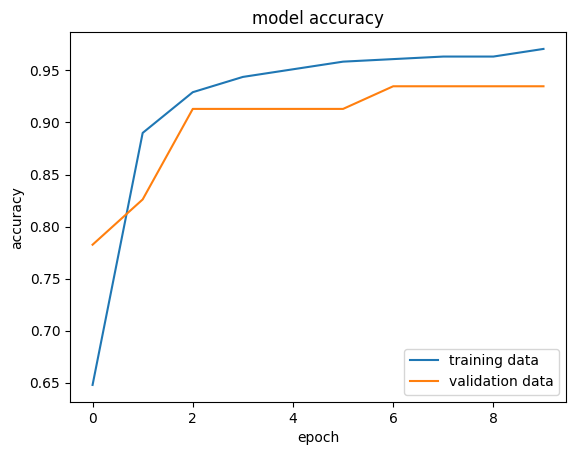

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc= 'lower right')

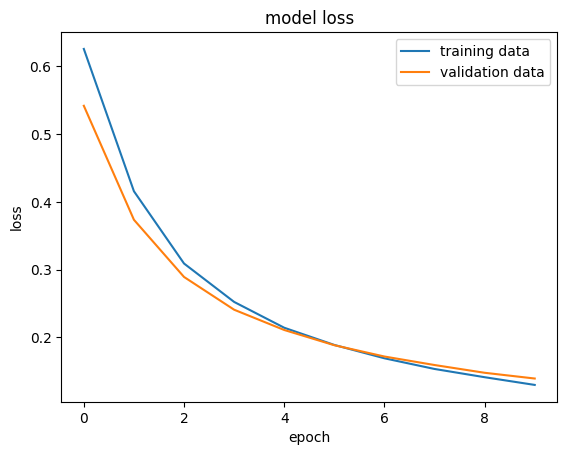

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc= 'upper right')

In [22]:
#Accuracy of the model on test data
loss, accuracy = model.evaluate(X_test_std, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.1182 - accuracy: 0.9649


In [23]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.08700339 -1.47192915 -0.10537391 -0.21479674  2.05627941 -0.18759821
  0.04345969  0.3431473   0.48693221  0.20971492  0.41483725  2.38110688
  0.53816721  0.01895993  0.95128447  0.31678369  0.28189043  2.21465008
 -0.39276605  0.44485916 -0.3863489  -1.69650664 -0.42190004 -0.44557481
  0.23041821 -0.75521902 -0.60192371 -0.26629174 -1.09776353 -0.65597459]


In [24]:
Y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 3ms/step


In [25]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.03746202 0.47789365]


In [26]:
print(X_test_std)

[[-0.08700339 -1.47192915 -0.10537391 ... -0.26629174 -1.09776353
  -0.65597459]
 [ 0.19989092  0.03577342  0.1706179  ...  0.44844054  0.06066588
   0.02108157]
 [-1.28858427 -0.21847659 -1.30667757 ... -1.41981535  0.19788632
  -0.31050377]
 ...
 [ 0.67523542  0.61546345  0.70329853 ...  1.36221218  1.000987
   0.62759948]
 [ 0.20832899  1.5866985   0.10942329 ... -1.35965118 -1.95719681
  -1.62740299]
 [ 0.78774299  0.03068842  0.84293725 ...  2.03773974  0.27299646
   0.34822356]]


In [27]:
print(Y_pred)

[[0.03746202 0.47789365]
 [0.390717   0.4586273 ]
 [0.00602843 0.60045695]
 [0.99998    0.1696315 ]
 [0.33113727 0.5123622 ]
 [0.9993673  0.15003398]
 [0.1567191  0.53517604]
 [0.0117272  0.6525951 ]
 [0.0529901  0.54452544]
 [0.02484214 0.6166955 ]
 [0.2650807  0.44520068]
 [0.0507081  0.40369654]
 [0.07813148 0.49114126]
 [0.1701907  0.45972392]
 [0.0265791  0.62342364]
 [0.9335892  0.14244215]
 [0.01710592 0.5626501 ]
 [0.01894146 0.5355847 ]
 [0.02837017 0.59558195]
 [0.99100536 0.3097814 ]
 [0.05549435 0.7085629 ]
 [0.01873744 0.58845145]
 [0.01520387 0.5657738 ]
 [0.01230012 0.56679577]
 [0.10921977 0.52995276]
 [0.9515193  0.28209153]
 [0.08065604 0.5216799 ]
 [0.22348759 0.41541457]
 [0.85957724 0.1500328 ]
 [0.9214222  0.1803135 ]
 [0.0730864  0.5205661 ]
 [0.04821555 0.5722246 ]
 [0.03136536 0.6112847 ]
 [0.9999446  0.03070723]
 [0.99388814 0.26642817]
 [0.09356345 0.53803754]
 [0.00885934 0.5743456 ]
 [0.14986978 0.51234543]
 [0.0055234  0.48588717]
 [0.05530065 0.41499883]


In [28]:
#model.predict() gives the predictio probability of each class for the data point
#converting the prediction probability to class labels
y_pred_labels = [np.argmax(i) for i in Y_pred]
y_pred_labels

[1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0]

In [29]:
#building the predictive system
input_data = (9.173,13.86,59.2,260.9,0.07721,0.08751,0.05988,0.0218,0.2341,0.06963,0.4098,2.265,2.608,23.52,0.008738,0.03938,0.04312,0.0156,0.04192,0.005822,10.01,19.23,65.59,310.1,0.09836,0.1678,0.1397,0.05087,0.3282,0.0849
)
#change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the numpy array as we are predicting for one data point
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)
#standarizing the input data
input_data_std = Scaler.transform(input_data_reshape)
prediction = model.predict(input_data_std)
print(prediction)
prediction_label = [np.argmax(prediction)]
print(prediction_label)
if(prediction_label[0] == 0):
  print("The tumor is Malignant")
else :
  print("The tumor is Benign")

1/1 [==============================] - 0s 27ms/step
[[0.0170015  0.62184817]]
[1]
The tumor is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
